In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use("ggplot")
from sklearn import tree

In [2]:
#Load and read csv data
nursing_df = pd.read_csv('output_data/model_data.csv')

In [3]:
#Start process of balancing dataframe
nursing_df.head().T

,0,1,2,3,4
Cum GPA,2.84,3.14,3.22,3.29,3.38
TEAS Count,1,1,1,2,2
MaxOfTestScore,76,74.7,75.3,77.3,72.7
failing grade count,0,0,0,0,0
Time to Test (days),209,73,84.51,60,80.33
Completion Time (days),591,467,578,591,600
PrecEducDesc,High School/GED/Some College,High School/GED/Some College,High School/GED/Some College,High School/GED/Some College,Associates
Grade,Pass,Pass,Pass,Fail,Pass
GradePass,1,1,1,0,1
HighSchool,1,1,1,1,0


In [4]:
params = {'n_estimators': 50000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.001}
reg = ensemble.GradientBoostingClassifier(**params)

In [5]:
nursing_df_pass = nursing_df[nursing_df["GradePass"]== 1]
len(nursing_df_pass)

898

In [6]:
nursing_df_fail = nursing_df[nursing_df["GradePass"] != 1]
len(nursing_df_fail)

327

In [7]:
#Finally create balanced df
new_data = pd.concat([nursing_df_fail ,nursing_df_pass.sample(n=len(nursing_df_fail)) ],copy=True,ignore_index=True)
len(new_data)

654

In [8]:
#Drop object columns
new = new_data.drop(['PrecEducDesc', 'Grade'], axis=1)
new.head()

,Cum GPA,TEAS Count,MaxOfTestScore,failing grade count,Time to Test (days),Completion Time (days),GradePass,HighSchool,Assoc,Bach,Masters
0,3.29,2.0,77.3,0,60.00,591.0,0.0,1.0,0.0,0.0,0.0
1,2.78,2.0,74.0,0,369.00,465.0,0.0,1.0,0.0,0.0,0.0
2,2.79,3.0,74.0,0,116.00,591.0,0.0,1.0,0.0,0.0,0.0
3,3.27,2.0,68.7,1,124.58,578.0,0.0,0.0,1.0,0.0,0.0
4,2.76,2.0,73.3,0,158.00,460.0,0.0,1.0,0.0,0.0,0.0


In [9]:
#Create a new dataframe without the target for data 
data = new.drop("GradePass", axis=1)
#Create feature names so the rf can determine feature importance.
feature_names = data.columns
data

,Cum GPA,TEAS Count,MaxOfTestScore,failing grade count,Time to Test (days),Completion Time (days),HighSchool,Assoc,Bach,Masters
0,3.29,2.0,77.3,0,60.00,591.0,1.0,0.0,0.0,0.0
1,2.78,2.0,74.0,0,369.00,465.0,1.0,0.0,0.0,0.0
2,2.79,3.0,74.0,0,116.00,591.0,1.0,0.0,0.0,0.0
3,3.27,2.0,68.7,1,124.58,578.0,0.0,1.0,0.0,0.0
4,2.76,2.0,73.3,0,158.00,460.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
649,3.38,2.0,72.7,0,80.33,600.0,0.0,1.0,0.0,0.0
650,3.83,1.0,79.3,0,49.32,465.0,1.0,0.0,0.0,0.0
651,3.10,1.0,80.0,0,52.00,586.0,1.0,0.0,0.0,0.0
652,2.53,1.0,84.7,1,146.00,591.0,1.0,0.0,0.0,0.0


In [10]:
#define target
target = new["GradePass"]
target_names = ["negative", "positive"]

In [11]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [12]:
#This was just a single tree test
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6585365853658537

In [13]:
#Import rfclassifier
from sklearn.ensemble import RandomForestClassifier
#set estimators and max depth
rf = RandomForestClassifier(n_estimators=100, max_depth=4)
rf = rf.fit(X_train, y_train)
#Run
rf.score(X_test, y_test)

0.7073170731707317

In [14]:
#Print feature importances to determine the strongest tells for pass/fail
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4093888774731955, 'Cum GPA'),
 (0.19757143595389184, 'Time to Test (days)'),
 (0.12733118674694593, 'Completion Time (days)'),
 (0.1100262794605042, 'MaxOfTestScore'),
 (0.07354177164998756, 'TEAS Count'),
 (0.054627381224412484, 'failing grade count'),
 (0.010130196952477162, 'Bach'),
 (0.008186043509291021, 'Masters'),
 (0.00473630404366327, 'Assoc'),
 (0.0044605229856309655, 'HighSchool')]

In [15]:
result = new.values
pd.DataFrame(result)

,0,1,2,3,4,5,6,7,8,9,10
0,3.29,2.0,77.3,0.0,60.00,591.0,0.0,1.0,0.0,0.0,0.0
1,2.78,2.0,74.0,0.0,369.00,465.0,0.0,1.0,0.0,0.0,0.0
2,2.79,3.0,74.0,0.0,116.00,591.0,0.0,1.0,0.0,0.0,0.0
3,3.27,2.0,68.7,1.0,124.58,578.0,0.0,0.0,1.0,0.0,0.0
4,2.76,2.0,73.3,0.0,158.00,460.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
649,3.38,2.0,72.7,0.0,80.33,600.0,1.0,0.0,1.0,0.0,0.0
650,3.83,1.0,79.3,0.0,49.32,465.0,1.0,1.0,0.0,0.0,0.0
651,3.10,1.0,80.0,0.0,52.00,586.0,1.0,1.0,0.0,0.0,0.0
652,2.53,1.0,84.7,1.0,146.00,591.0,1.0,1.0,0.0,0.0,0.0


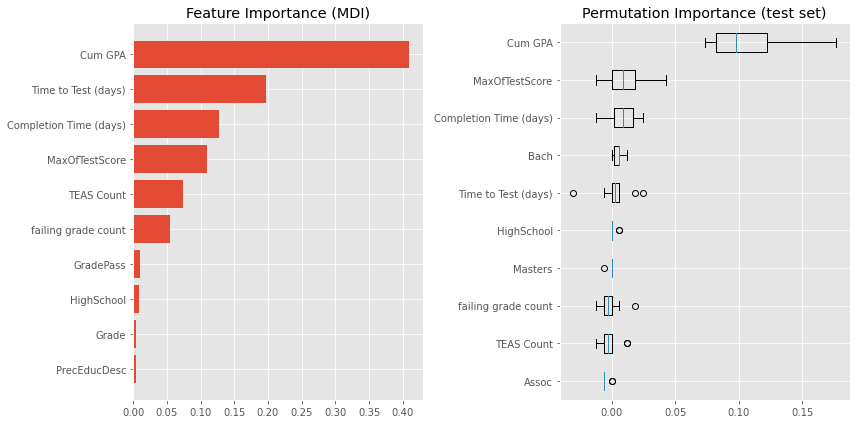

In [16]:
#plot feature importance

feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, new_data.columns[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels= data.columns[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.savefig('random_tree.png')
plt.show()

In [17]:
y_predict = rf.predict(X_test)
y_predict

array([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1.])

In [18]:
y_test

333    1.0
78     0.0
503    1.0
290    0.0
360    1.0
      ... 
89     0.0
480    1.0
618    1.0
467    1.0
336    1.0
Name: GradePass, Length: 164, dtype: float64

In [19]:
 # Calculate classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73        89
         1.0       0.68      0.68      0.68        75

    accuracy                           0.71       164
   macro avg       0.71      0.71      0.71       164
weighted avg       0.71      0.71      0.71       164



In [20]:
#Create class report to determine false positives and false negatives
class_report = classification_report(y_test, y_predict, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df

,precision,recall,f1-score,support
0.0,0.730337,0.730337,0.730337,89.000000
1.0,0.680000,0.680000,0.680000,75.000000
accuracy,0.707317,0.707317,0.707317,0.707317
macro avg,0.705169,0.705169,0.705169,164.000000
weighted avg,0.707317,0.707317,0.707317,164.000000


In [21]:
#Percision of 0 is the ratio of false negatives 
    #or correctly reported failing grades / the total number of pass and fail reported as fails and shows the validity of the model.
#Recall of 0 is the ratio of reported failing grades / the total number of failing grades (including those that the model missed)
    #which shows how completely the desired data is correctly used
#Percision of 1 is the ratio of false positives
    # or correctly reported passing grades / the total number of pass and fail reported as pass, shows the validity of the model
#Recall of 1 is the ratio of passing grades used / the total number of passing grades in the data set(including those the model passed over)


In [22]:
#import os
#os.system('dot -Tpng tree.dot -o treeu.png')

In [23]:
#from IPython.display import Image
#Image(filename = 'extreme_tree.png')